In [1]:
import fastf1
import pandas as pd
fastf1.Cache.enable_cache('cache') 
session = fastf1.get_session(2023,'Las Vegas','R')
session.load(telemetry=True)
drivs = session.drivers
abv = session.results[['DriverNumber','Abbreviation']].to_dict()['Abbreviation']
abv = {v: k for k, v in abv.items()}
# driver_inter_df={}
df_with_pos = pd.DataFrame()
for d in abv.keys():
    # driver_inter_df[d] = pd.DataFrame(session.pos_data[abv[d]])
    d_new = pd.DataFrame(session.pos_data[abv[d]]).iloc[2373:24490]
    d_new['Driver'] = d
    df_with_pos = pd.concat([df_with_pos,d_new])
team_colors = session.results[['Abbreviation','TeamColor']].set_index('Abbreviation').to_dict()['TeamColor']

for i,j in team_colors.items():
    team_colors[i] = '#'+str(j)

df_with_pos  = df_with_pos[['X','Y','Driver']]
# df_with_pos.to_csv('df_with_pos.csv')

core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.1.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '31', '18', '55', '44', '63', '14', '81', '10', '23', '20', '3', '24', '2', '77', '22', '27', '4']


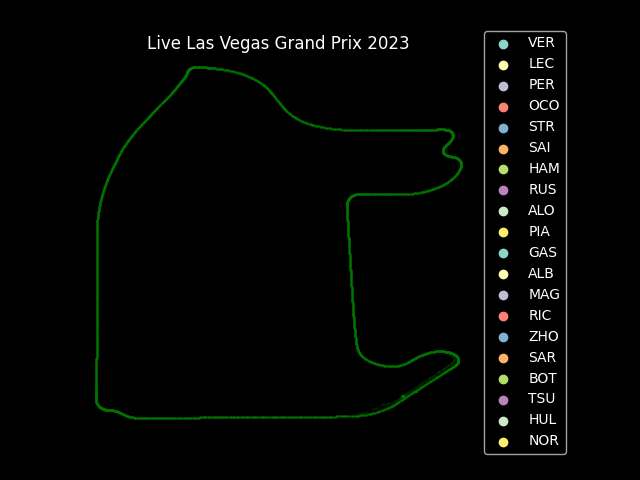

In [9]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# df_new = pd.read_csv('df_with_pos.csv')
df_new = df_with_pos
df_new = df_new[['X','Y','Driver']]
coords = df_new[df_new['Driver']=='VER']
plt.style.use('dark_background')

def update(frame):
    frame_data = df_new[df_new['Frame'] == frame]

    for driver_id in drivers:
        driver_data = frame_data[frame_data['Driver'] == driver_id]
        scatter_plots[driver_id].set_offsets(driver_data[['X', 'Y']])
        for annotation in annotations[driver_id]:
            annotation.remove()
        annotations[driver_id] = []
        for i, (x, y, driver) in driver_data[['X', 'Y', 'Driver']].iterrows():
            annotation = ax.annotate(f"{driver}", (x, y), fontsize=8, color='white', ha='right', va='bottom')
            annotations[driver_id].append(annotation)

    return scatter_plots


df_new['Frame'] = np.tile(np.arange(df_new['X'].size // len(df_new['Driver'].unique())), len(df_new['Driver'].unique()))

fig, ax = plt.subplots()
plt.scatter(coords['X'],coords['Y'],color='green',alpha=0.1,s=0.5)
drivers = df_new['Driver'].unique()
scatter_plots = {driver: ax.scatter([], [],label=driver) for driver in drivers}
annotations = {driver: [] for driver in drivers}
ax.set_xlim(df_new['X'].min()-500, df_new['X'].max()+500)
ax.set_ylim(df_new['Y'].min()-500, df_new['Y'].max()+500)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axis('off')
ax.set_title('Live Las Vegas Grand Prix 2023')
# ax.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ani = animation.FuncAnimation(fig=fig, func=update, frames=df_new['Frame'].nunique(), interval=2, blit=True)

plt.show()
